<a href="https://colab.research.google.com/github/austineDboss/Game-project/blob/master/Case2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case 2 - Pneumonia X-ray image analysis
Neural Networks for Health Technology Applications<br>
02.02.2020, Augustine Igbinidu-Uwuigbe & Mai Vu (team 18)<br>
Metropolia University of Applied Sciences<br><br>

## Contents
<ol>
    <li>Background</li>
    <li>Data Analysis</li>
    <li>Models and Training</li>
    <li>Results</li>
    <li>Conclusions</li>
</ol>

## 1. Background

This report shows the neural network process the patients' validated Optical coherence tomography (OCT) and Chest X-Ray images collected by the University of California San Diego. The goal is to come up with a good classification of the patients' heart disease, whether it is normal or pneumonia, based on those data. The tools are Keras and Image Preprocessing provided by the TensorFlow library.<br>
The dataset is preprocessed before applying different neural network structures. It is important to deeply understand the data and carefully run tests with appropriate neural network architectures. The results of each model and conclusions are also mentioned in this report.<br>
Creating a neural network for this particular purpose is needed, especially when the novel virus is spreading worldwide. The neural network model would save time and medical staff resources.

## 2. Data Analysis

In [59]:
#import needed libraries
%pylab inline
import os
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import *
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Populating the interactive namespace from numpy and matplotlib


In [0]:
#The below code mounts google drive folder to google colab
from google.colab import drive
drive.mount('/content/drive')

In [20]:
train_dir = "/content/drive/My Drive/colab/chest_xray/train" #The address of the train file
test_dir = "/content/drive/My Drive/colab/chest_xray/test"
os.listdir(train_dir) #Print the list of all files and directories in the above directory

['NORMAL', 'PNEUMONIA', '.DS_Store']

There are 2 files in the training file (as well as in the testing file), separating 2 cases of our predicted variables: Normal and Pneumonia. The total train data is 5232 (1349 Normal cases and 3883 Pneumonia cases), which are combined and then divided into the train set and validation set. Both have the number of images to be produced in a batch or batch size of 32.

In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.3)

In [6]:
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary',
                    shuffle = True,
                    subset = 'training')
dev_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary',
                    shuffle = True,
                    subset = 'validation')

Found 3664 images belonging to 2 classes.
Found 1568 images belonging to 2 classes.


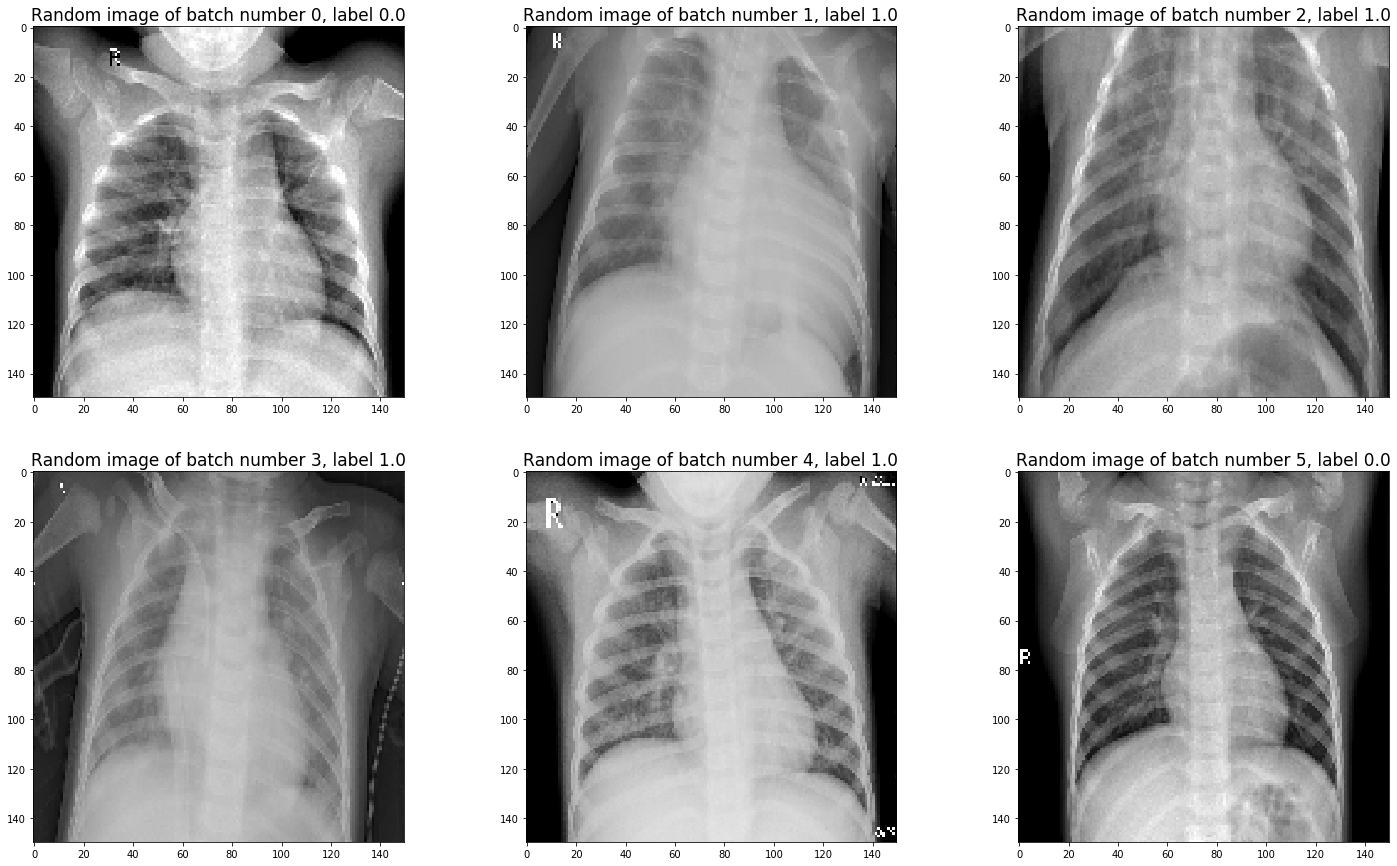

In [0]:
i = 0
plt.figure(figsize = (25,15))
for data_batch, labels_batch in train_generator:
    rand = randint(0,31)
    
    plt.subplot(2, 3, i + 1, aspect = 'equal')
    imshow(data_batch[rand])
    plt.title('Random image of batch number ' + str(i) + ', label ' + str(labels_batch[rand]), fontsize = 17)
    
    i = i + 1
    if i > 5:
        break
        
plt.show()

In the real world, doctors look at those images and seek white spots in the patient's lung, meaning he or she has pneumonia. A non-medical person might spot incorrectly or ignore these white spots. However, normal and pneumonia cases have patterns that can be recognized correctly by a neural network.

## 3. Models and Training

Three models are tested here. Model1 and Model2 are quite similar as they have the same number of layers and the same activation functions While Model3 has 1 more layer added to it. Because the problem is binary classification, the last dense layer has 1 unit.<br>

The first one is the original model and its summary is shown below. Because the model1 and Model3 has low accuracies, so the second model is the final model that has been deeply modified based on observations on the first one.Attempt was made to improve  Model3 based on some observations from the training data-graph, but no higher accuracy for test data was achieved.

The summaries show that the model2 has more filters than model1, which seems to result in higher accuracy.

In [0]:
#First model
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation = 'relu'))
model1.add(layers.Dense(1, activation = 'sigmoid'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               21234176  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5

In [0]:
#Second model
model2 = models.Sequential()
model2.add(layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation = 'relu'))
model2.add(layers.Dense(1, activation = 'sigmoid'))
model2.summary()

In [7]:
#Third model
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation = 'relu'))
model3.add(layers.Dense(1, activation = 'sigmoid'))
model3.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________

In [28]:
#fourth Model
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model4.add(layers.MaxPooling2D((2,2)))
model4.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model4.add(layers.MaxPooling2D((2,2)))
model4.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model4.add(layers.MaxPooling2D((2,2)))
model4.add(layers.Flatten())
model4.add(layers.Dense(512, activation = 'relu'))
model4.add(layers.Dense(1, activation = 'sigmoid'))
model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9248)             

After a few tests, the learning rate 0.0001 seems good because of the loss and accuracy graph curves. Epochs, steps per epoch and validation steps are examined as well to reduce the running time while keeping a high enough accuracy. It is super time-consuming to pass the entire dataset over and over. Epochs are increased up to 100 with its loss and accuracy graphs as below. From those graphs, the final models have 20 epochs which is goodly enough and not overfitting.

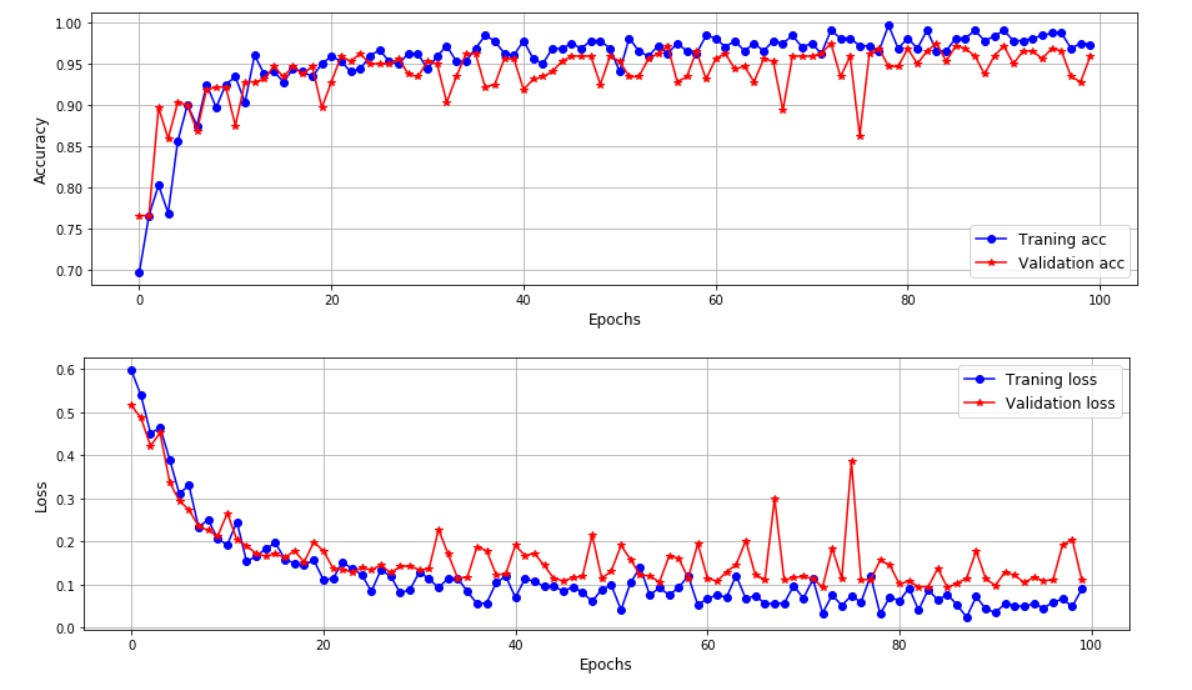

In [56]:

from IPython.display import Image
Image(filename="/content/drive/My Drive/colab/colab.jpeg") 

![100epochs.PNG](attachment:100epochs.PNG)

In [0]:
model1.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr = 1e-4),
              metrics = ['accuracy'])
history1 = model1.fit_generator(
            train_generator,
            steps_per_epoch = 10,
            verbose = 0,
            epochs = 20,
            validation_data = dev_generator,
            validation_steps = 10)

In [0]:
model2.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr = 1e-4),
              metrics = ['accuracy'])
history2 = model2.fit_generator(
            train_generator,
            steps_per_epoch = 10,
            verbose = 0,
            epochs = 20,
            validation_data = dev_generator,
            validation_steps = 10)

In [0]:
model3.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr = 1e-5),
              metrics=[metrics.SensitivityAtSpecificity(0.95)])
history3 = model3.fit_generator(
            train_generator,
            steps_per_epoch = 10,
            verbose = 1,
            epochs = 80,
            validation_data = dev_generator,
            validation_steps = 10)

In [0]:
model4.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr = 1e-5),
              metrics=[metrics.SensitivityAtSpecificity(0.9)])
history4 = model4.fit_generator(
            train_generator,
            steps_per_epoch = 10,
            verbose = 1,
            epochs = 70,
            validation_data = dev_generator,
            validation_steps = 10)

In [0]:
train1_acc = history1.history['accuracy']
val1_acc = history1.history['val_accuracy']
train1_loss = history1.history['loss']
val1_loss = history1.history['val_loss']

train2_acc = history2.history['accuracy']
val2_acc = history2.history['val_accuracy']
train2_loss = history2.history['loss']
val2_loss = history2.history['val_loss']
epochs = range(len(train1_acc))

In [0]:
train3_SAS = history3.history['sensitivity_at_specificity_2']
val3_SAS = history3.history['val_sensitivity_at_specificity_2']
train3_loss = history3.history['loss']
val3_loss = history3.history['val_loss']
epochs = range(len(train3_acc))

In [0]:
train4_SAS = history4.history['sensitivity_at_specificity_4']
val4_SAS = history4.history['val_sensitivity_at_specificity_4']
train4_loss = history4.history['loss']
val4_loss = history4.history['val_loss']
epochs = range(len(train4_SAS))

## 4. Results

The test files are inputted here without shuffle in order to verify the predicted values with the real one. Each model is applied to the test images, resulting in an array holding the percentage of having diseases. This array has to be converted by comparing its values with 0.5 to get the final predicted labels that can be compared with the real labels from the test set. The confusion matrix and classification report for the second model are printed.

In [51]:
#TEST IS INPUTTED
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
                    test_dir,
                    target_size = (150,150),
                    shuffle = False,
                    class_mode = 'binary')
labels = test_generator.labels

Found 624 images belonging to 2 classes.


In [0]:
#Run the model with the test set
test1 = model1.evaluate(test_generator, verbose = 1)
test2 = model2.evaluate(test_generator, verbose = 1)
print('Loss and accurancy of model 1: ', test1)
print('Loss and accurancy of model 1: ', test2)

20/20 [==============================] - 14s 706ms/step - loss: 0.3319 - accuracy: 0.8413
Loss and accurancy of model 1:  [0.8793826872017234, 0.64903843]
Loss and accurancy of model 1:  [0.33187713474035263, 0.84134614]


In [65]:
test3 = model3.evaluate(test_generator, verbose = 1)
print('Loss and accuracy of model 3: ', test3)

20/20 [==============================] - 11s 549ms/step - loss: 0.4769 - sensitivity_at_specificity_2: 0.7103
Loss and accuracy of model 3:  [0.476861031819135, 0.7102564]


In [71]:
test4 = model4.evaluate(test_generator, verbose = 1)
print('Loss and accuracy of model 4: ', test4)

20/20 [==============================] - 11s 546ms/step - loss: 0.3812 - sensitivity_at_specificity_4: 0.8513
Loss and accuracy of model 4:  [0.3811849532648921, 0.85128206]


In [0]:
predicted1 = model1.predict(test_generator)
predicted1 = (predicted1 > 0.5).astype(int).flatten() #Convert the model

predicted2 = model2.predict(test_generator)
predicted2 = (predicted2 > 0.5).astype(int).flatten() #Convert the model

In [0]:
predicted3 = model3.predict(test_generator)
predicted3 = (predicted3 > 0.5).astype(int).flatten() #Convert the model


predicted4 = model4.predict(test_generator)
predicted4 = (predicted4 > 0.5).astype(int).flatten()#Convert the model

In [0]:
print(confusion_matrix(predicted2, labels).T)
print(classification_report(predicted2, labels))
print(accuracy_score(predicted2, labels))

[[181  53]
 [ 46 344]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       227
           1       0.88      0.87      0.87       397

   micro avg       0.84      0.84      0.84       624
   macro avg       0.83      0.83      0.83       624
weighted avg       0.84      0.84      0.84       624

0.8413461538461539


In [68]:
print(confusion_matrix(predicted3, labels).T)
print(classification_report(predicted3, labels))
print(accuracy_score(predicted3, labels))

[[106 128]
 [  6 384]]
              precision    recall  f1-score   support

           0       0.45      0.95      0.61       112
           1       0.98      0.75      0.85       512

    accuracy                           0.79       624
   macro avg       0.72      0.85      0.73       624
weighted avg       0.89      0.79      0.81       624

0.7852564102564102


In [75]:
print(confusion_matrix(predicted4, labels).T)
print(classification_report(predicted4, labels))
print(accuracy_score(predicted4, labels))

[[129 105]
 [  9 381]]
              precision    recall  f1-score   support

           0       0.55      0.93      0.69       138
           1       0.98      0.78      0.87       486

    accuracy                           0.82       624
   macro avg       0.76      0.86      0.78       624
weighted avg       0.88      0.82      0.83       624

0.8173076923076923


##Observations

1) MAJOR OBSERVATION

The First two models which have similar number of layers where

-Model1 uses Conv2D(32) uses 32 filters.

-Model2 uses Conv2D(64) uses 64 filters.

The other parameters for Model1 and Model2 where the same but the accuracy of both had a huge difference with Model1 having about 64% accuracy and Model2 having an accuracy of 85%.

-Thus we conclude that the number of filters has affected the accuracy of the model.

2) MAJOR OBSERVATION

The last 2 models had an additional number of layer where

-Model 3 and 4 Conv2D(32) Both uses 32 filters

But Model3 uses 80 epochs and produces an accuracy of 79% with 95.5% sensitivityatspecificity
While Model4 was tuned to 70 epochs based on observation from Model3 but it produces an accuracy of 82% with 90% SensitivityAtSpecificity

-This tells that the model can be tuned further between 70-80 epoch to produce better accuracy.

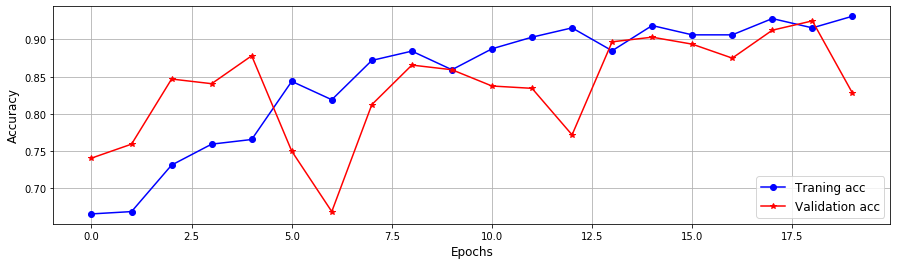

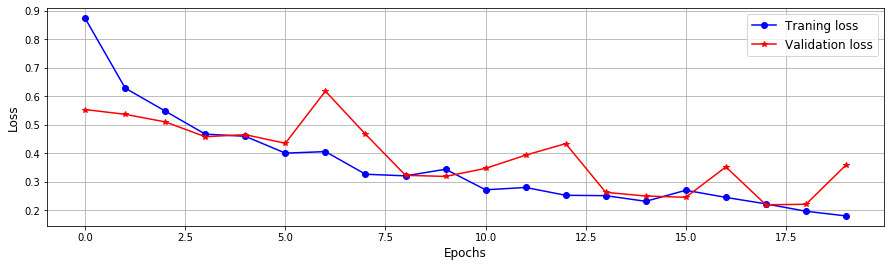

In [0]:
plt.figure(figsize = (15,4))
plt.plot(epochs, train1_acc, 'bo-', label = 'Traning acc')
plt.plot(epochs, val1_acc, 'r*-', label = 'Validation acc')
plt.xlabel('Epochs', fontsize = 12)
plt.ylabel('Accuracy', fontsize = 12)
plt.legend(loc = 'lower right', fontsize = 12)
plt.grid()
plt.show() 

plt.figure(figsize = (15, 4))
plt.plot(epochs, train1_loss, 'bo-', label = 'Traning loss')
plt.plot(epochs, val1_loss, 'r*-', label = 'Validation loss')
plt.xlabel('Epochs', fontsize = 12)
plt.ylabel('Loss', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 12)
plt.grid()
show()

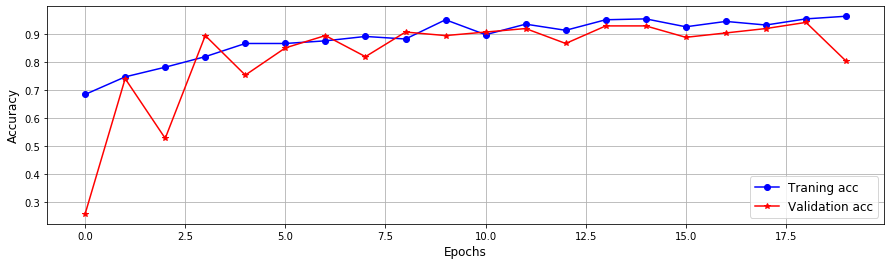

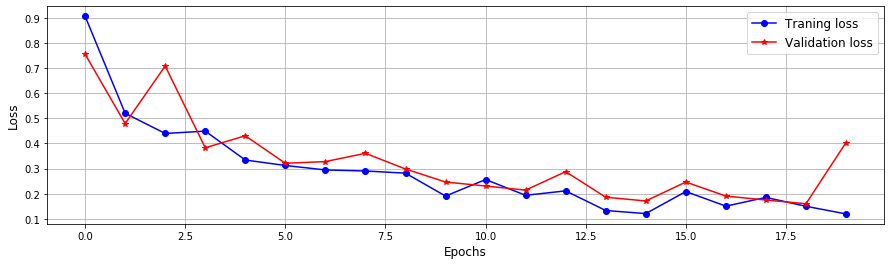

In [0]:
plt.figure(figsize = (15,4))
plt.plot(epochs, train2_acc, 'bo-', label = 'Traning acc')
plt.plot(epochs, val2_acc, 'r*-', label = 'Validation acc')
plt.xlabel('Epochs', fontsize = 12)
plt.ylabel('Accuracy', fontsize = 12)
plt.legend(loc = 'lower right', fontsize = 12)
plt.grid()
plt.show() 

plt.figure(figsize = (15, 4))
plt.plot(epochs, train2_loss, 'bo-', label = 'Traning loss')
plt.plot(epochs, val2_loss, 'r*-', label = 'Validation loss')
plt.xlabel('Epochs', fontsize = 12)
plt.ylabel('Loss', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 12)
plt.grid()
show()

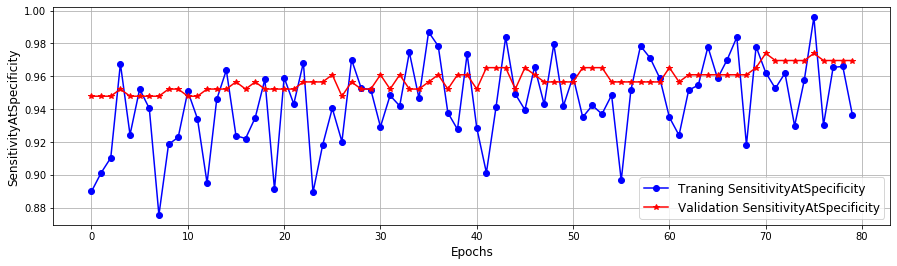

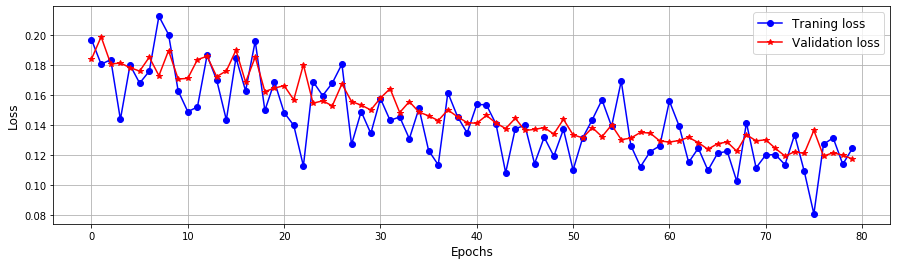

In [89]:
plt.figure(figsize = (15,4))
plt.plot(epochs, train3_SAS, 'bo-', label = 'Traning SensitivityAtSpecificity')
plt.plot(epochs, val3_SAS, 'r*-', label = 'Validation SensitivityAtSpecificity')
plt.xlabel('Epochs', fontsize = 12)
plt.ylabel('SensitivityAtSpecificity', fontsize = 12)
plt.legend(loc = 'lower right', fontsize = 12)
plt.grid()
plt.show() 

plt.figure(figsize = (15, 4))
plt.plot(epochs, train3_loss, 'bo-', label = 'Traning loss')
plt.plot(epochs, val3_loss, 'r*-', label = 'Validation loss')
plt.xlabel('Epochs', fontsize = 12)
plt.ylabel('Loss', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 12)
plt.grid()
show()

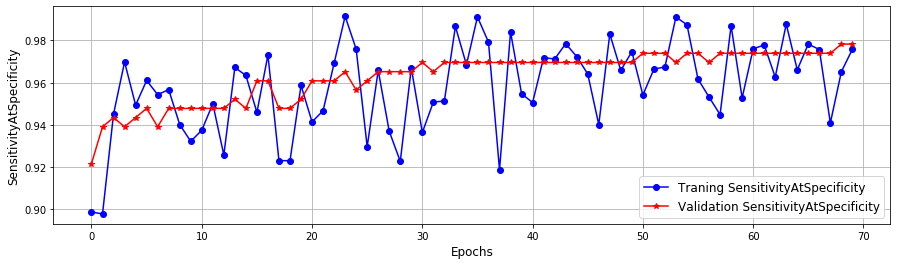

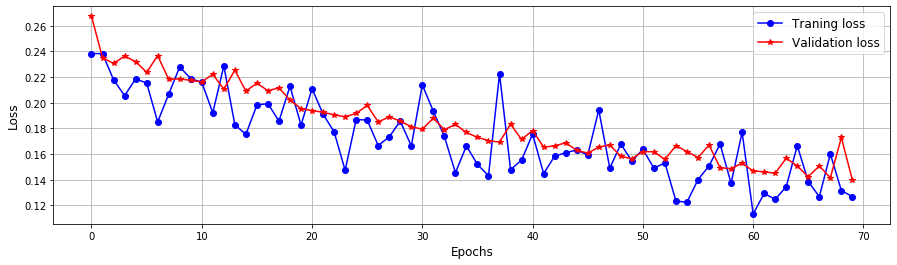

In [92]:
plt.figure(figsize = (15,4))
plt.plot(epochs, train4_SAS, 'bo-', label = 'Traning SensitivityAtSpecificity')
plt.plot(epochs, val4_SAS, 'r*-', label = 'Validation SensitivityAtSpecificity')
plt.xlabel('Epochs', fontsize = 12)
plt.ylabel('SensitivityAtSpecificity', fontsize = 12)
plt.legend(loc = 'lower right', fontsize = 12)
plt.grid()
plt.show() 

plt.figure(figsize = (15, 4))
plt.plot(epochs, train4_loss, 'bo-', label = 'Traning loss')
plt.plot(epochs, val4_loss, 'r*-', label = 'Validation loss')
plt.xlabel('Epochs', fontsize = 12)
plt.ylabel('Loss', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 12)
plt.grid()
show()

## 5. Conclusions

The validation SensitivityAtSpecificity graphs fluctuates less than the training SensitivityAtSpecificity graph and same goes for the loss graph.


From Model3 data training-graph above the optimal SensitivityAtSpecificity and loss value is achieved at epoch = 70. which means new model can be tested with 70 epochs to see what accuracy can be achieved.

The loss and accuracy graphs for the second model fluctuate less than the first one. The accuracies for the training and validation sets are approximately equal and high, while the accuracy for the test set is a little bit lower. There is no clear sign that this model is overfitting. The classification report from model2 shows the rates are in good fits as well. The model can be examined deeper when plotting the ROC curve and calculate the AUC.<br>
There are few tests for fixing the imbalance datasets such as setting weights before training or image data augmentation. While setting weights is not increase the rates or accuracies (actually it is lower than without weights init in most tests), image data augmentation takes more time to configure (it has errors due to lack of coding experiences). Adding those tests to the final report seems unapproachable so we keep the report simple and straightforward.<br>
In conclusion, the best model we got (without overfitting) has nearly 90% accuracy (Even though it is better to look at rates from the classification report because the data is imbalanced). The final model can be better and we hope to achieve higher accuracy (>95%) in the future.